In [2]:
import plot_tools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional plot style
# Using 'seaborn-v0_8-whitegrid' gives a clean background grid.
plt.style.use('seaborn-v0_8-notebook')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (14, 8)
})

In [3]:
# X-axis labels for both plots
x_labels = ['0-6m', '6-12m', '12-18m', '18-24m', '24-30m', '30-36m']

legends = {
    'inutero_b_avg_pos_int': 'Shock In Utero', 
    'born_1m6m_b_avg_pos_int':   'Shock at 0-6m', 
    'born_6m12m_b_avg_pos_int':  'Shock at 6-12m', 
    'born_12m18m_b_avg_pos_int': 'Shock at 12-18m', 
    'born_18m24m_b_avg_pos_int': 'Shock at 18-24m', 
    'born_24m30m_b_avg_pos_int': 'Shock at 24-32m', 
    'born_30m36m_b_avg_pos_int': 'Shock at 32-36m',
    'inutero_b_avg_neg_int': 'Shock In Utero', 
    'born_1m6m_b_avg_neg_int':   'Shock at 0-6m', 
    'born_6m12m_b_avg_neg_int':  'Shock at 6-12m', 
    'born_12m18m_b_avg_neg_int': 'Shock at 12-18m', 
    'born_18m24m_b_avg_neg_int': 'Shock at 18-24m', 
    'born_24m30m_b_avg_neg_int': 'Shock at 24-32m', 
    'born_30m36m_b_avg_neg_int': 'Shock at 32-36m',
}

def negate_dict_values(d):
    if isinstance(d, dict):
        return {k: negate_dict_values(v) for k, v in d.items()}
    elif isinstance(d, list):
        return [-1 * v if isinstance(v, (int, float)) else v for v in d]
    elif isinstance(d, (int, float)):
        return -1 * d
    else:
        return d

import numpy as np
import matplotlib.pyplot as plt

def create_coefficient_plot(data, title, ylabel, color_map_name, ax, legend, vmin=-2, vmax=4):
    """
    Creates and styles a coefficient plot with confidence intervals and highlights
    statistically significant points.

    Args:
        data (dict): Dictionary containing coefficient and standard error data.
        title (str): The title of the plot.
        ylabel (str): The label for the y-axis.
        color_map_name (str): The name of the matplotlib colormap to use.
        ax (matplotlib.axes.Axes): The axes object to plot on.
        legend (bool): Whether to display the legend.
        vmin, vmax (float): Y-axis limits.
    """
    num_lines = len(data) #- 3
    colors = plt.cm.get_cmap(color_map_name, num_lines+1)

    # Loop through each variable to plot its coefficients and CIs
    for i, (label, values) in enumerate(data.items()):
        coeffs = np.array(values['coef'])[:num_lines]
        se = np.array(values['se'])[:num_lines]
        ci_lower = coeffs - 1.96 * se
        ci_upper = coeffs + 1.96 * se

        # Plot the main line and shaded confidence interval
        ax.plot(x_labels[:num_lines], coeffs, marker='o', linestyle='-', label=legends.get(label, label), color=colors(i), zorder=10)
        ax.fill_between(x_labels[:num_lines], ci_lower, ci_upper, color=colors(i), alpha=0.1, zorder=5)

        for j, (coef, lower, upper) in enumerate(zip(coeffs, ci_lower, ci_upper)):
            # A point is significant if its CI does not include 0.
            # This happens when both the lower and upper bounds have the same sign.
            if not np.isnan(coef) and (lower*upper>0):
                ax.plot(j, coef, marker='D', color=colors(i), markersize=8, zorder=20, linestyle='None')
        if i==num_lines-1:
            break
        
    # --- Styling and Annotations ---
    ax.axhline(0, color='black', linewidth=1.2, zorder=0)
    ax.set_xlabel('Age of Mortality', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, pad=20, loc='left', weight='bold', fontsize=16)
    ax.set_ylim(bottom=vmin, top=vmax)

    if legend:
        ax.legend(title='Timing of Temperature Shock', loc='upper right', frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_visible(False)
    ax.grid(axis='y', alpha=0.4, linestyle='--')
    ax.grid(axis='x', alpha=0)

C:\Users\abbat\AppData\Local\Temp\ipykernel_28768\447573169.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


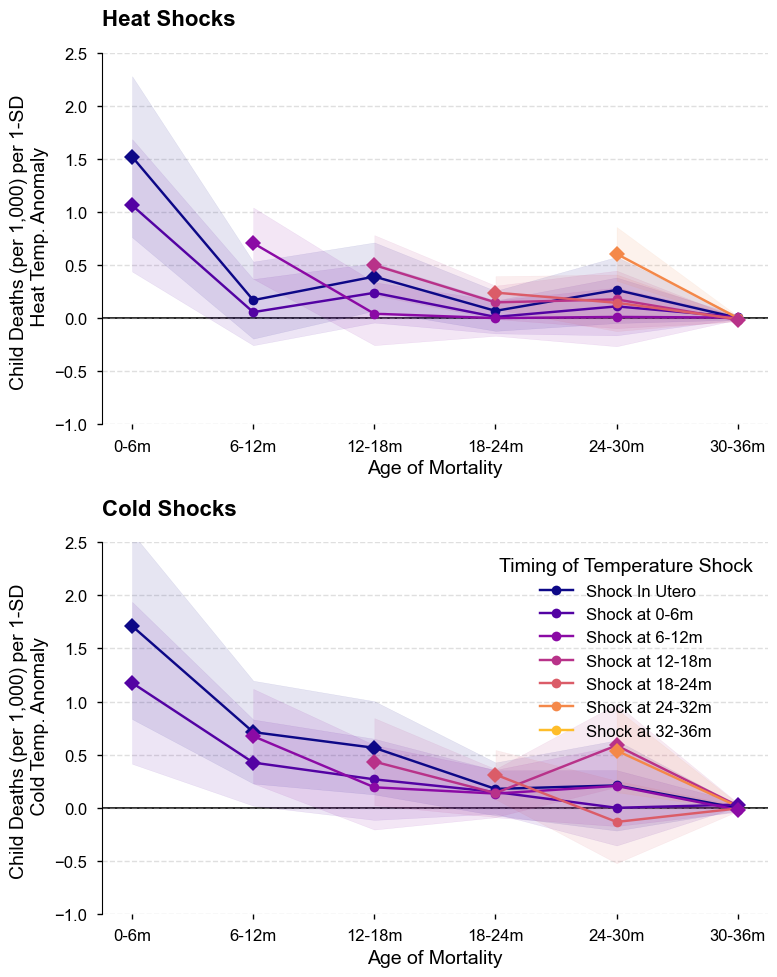

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\linear_dummies_true_spi1_b_avg_stdm_t semester standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Heat Shocks',
    ylabel='Child Deaths (per 1,000) per 1-SD \n Heat Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0],
    legend=False,
    vmin=-1,
    vmax=2.5
)

create_coefficient_plot(
    data=low_temp,
    title='Cold Shocks',
    ylabel='Child Deaths (per 1,000) per 1-SD \n Cold Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1],
    legend=True,
    vmin=-1,
    vmax=2.5,
)

plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig 1.png", dpi=450, bbox_inches="tight")

## Por survival

C:\Users\abbat\AppData\Local\Temp\ipykernel_28768\447573169.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


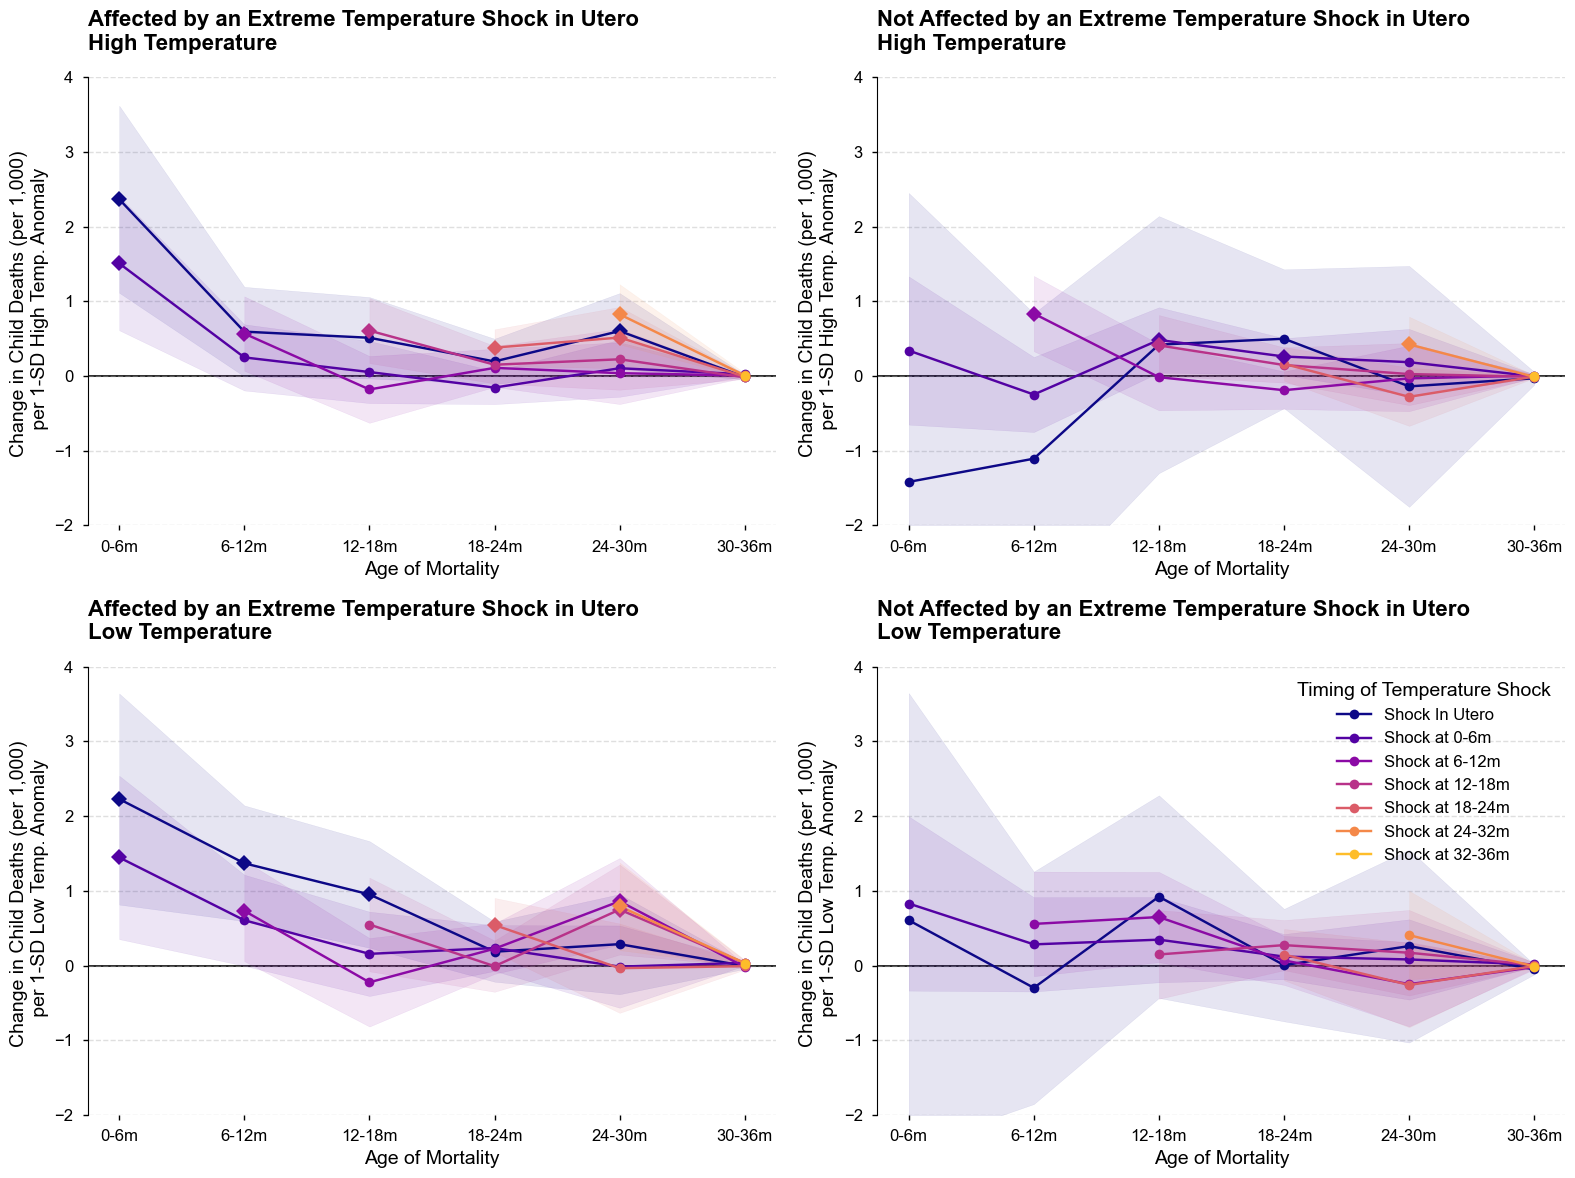

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\shock_analysis_p25p0_p75p0\linear_dummies_true_spi1_b_avg_stdm_t semester - shock_group standard_fe standard_sym.tex" # Replace with the actual path to your LaTeX file.
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Affected by an Extreme Temperature Shock in Utero\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Affected by an Extreme Temperature Shock in Utero\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][0],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\shock_analysis_p25p0_p75p0\linear_dummies_true_spi1_b_avg_stdm_t semester - control_group standard_fe standard_sym.tex" # Replace with the actual path to your LaTeX file.
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Not Affected by an Extreme Temperature Shock in Utero\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][1],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Not Affected by an Extreme Temperature Shock in Utero\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=True,
)

plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig 5 - Affected in-utero.png", dpi=450, bbox_inches="tight")

## Tipo de CLimatic band

C:\Users\abbat\AppData\Local\Temp\ipykernel_28768\447573169.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


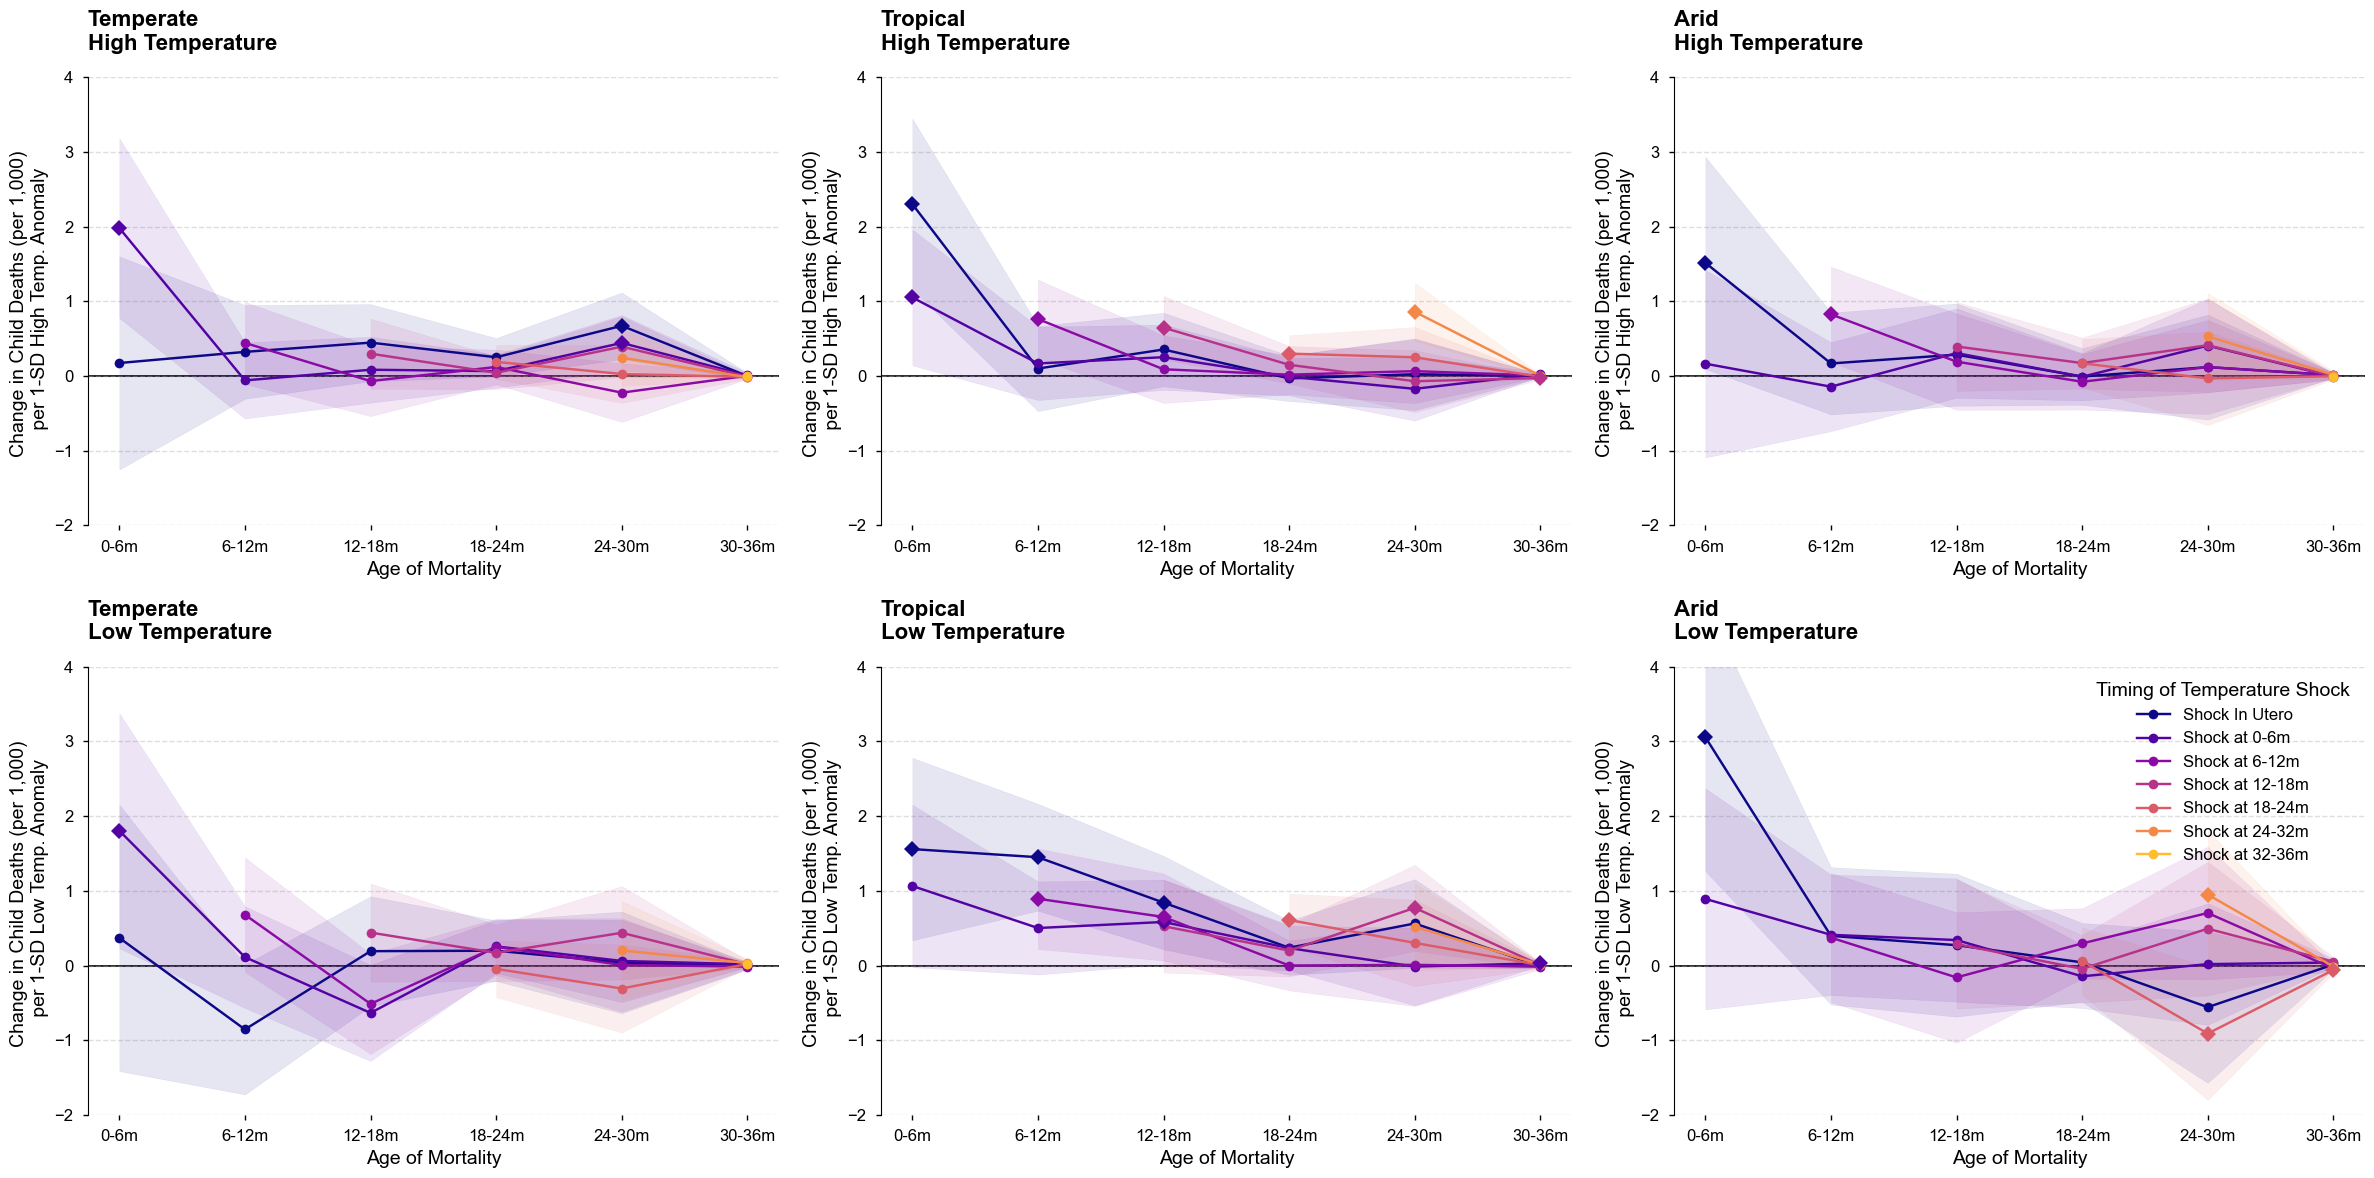

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(24, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\climate_band_1\linear_dummies_true_spi1_b_avg_stdm_t semester - Temperate standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Temperate\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Temperate\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][0],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\climate_band_1\linear_dummies_true_spi1_b_avg_stdm_t semester - Tropical standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Tropical\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][1],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Tropical\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=False,
)

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\climate_band_1\linear_dummies_true_spi1_b_avg_stdm_t semester - Arid standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Arid\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][2],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Arid\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][2],
    legend=True,
)


plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig Cliamte Bands.png", dpi=450, bbox_inches="tight")

## Electricidad

C:\Users\abbat\AppData\Local\Temp\ipykernel_28768\447573169.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


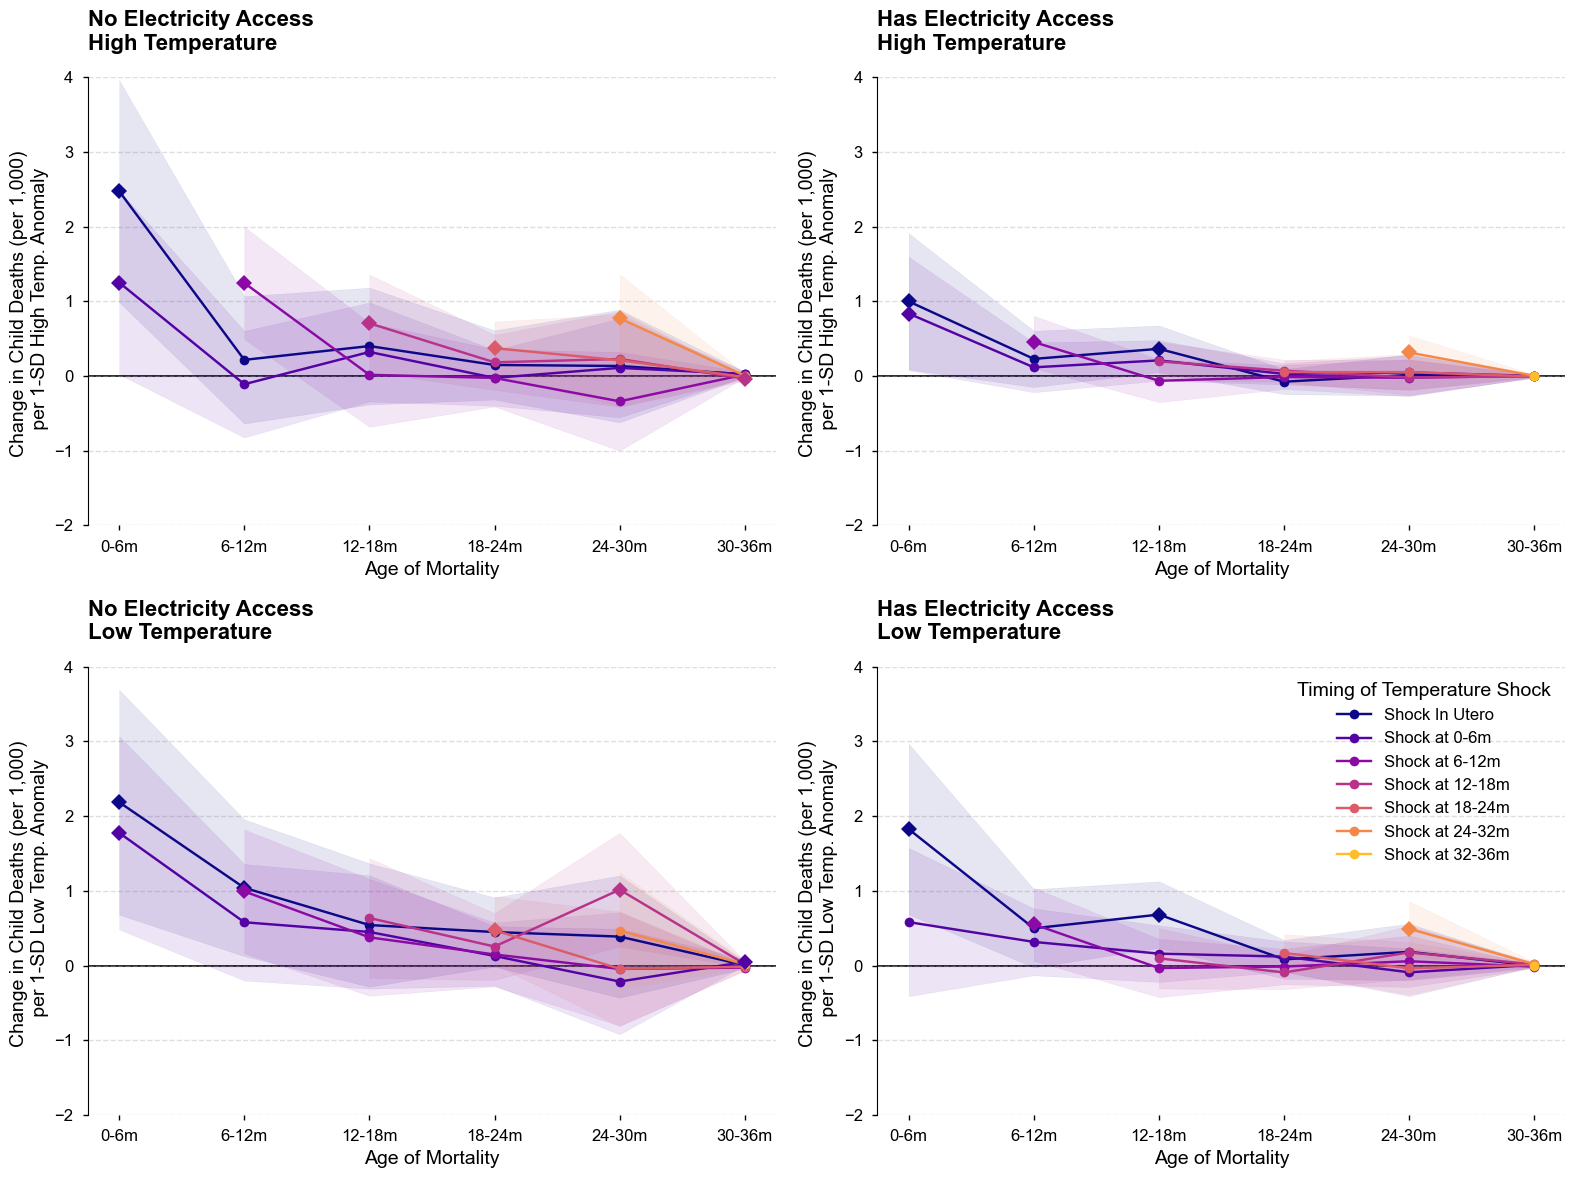

In [7]:
# Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 0.0 standard_fe standard_sym.txt 
# Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 1.0 standard_fe standard_sym.txt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 0.0 standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='No Electricity Access\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='No Electricity Access\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][0],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 1.0 standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Has Electricity Access\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][1],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Has Electricity Access\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=True,
)


plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig Electricity.png", dpi=450, bbox_inches="tight")

C:\Users\abbat\AppData\Local\Temp\ipykernel_28768\447573169.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


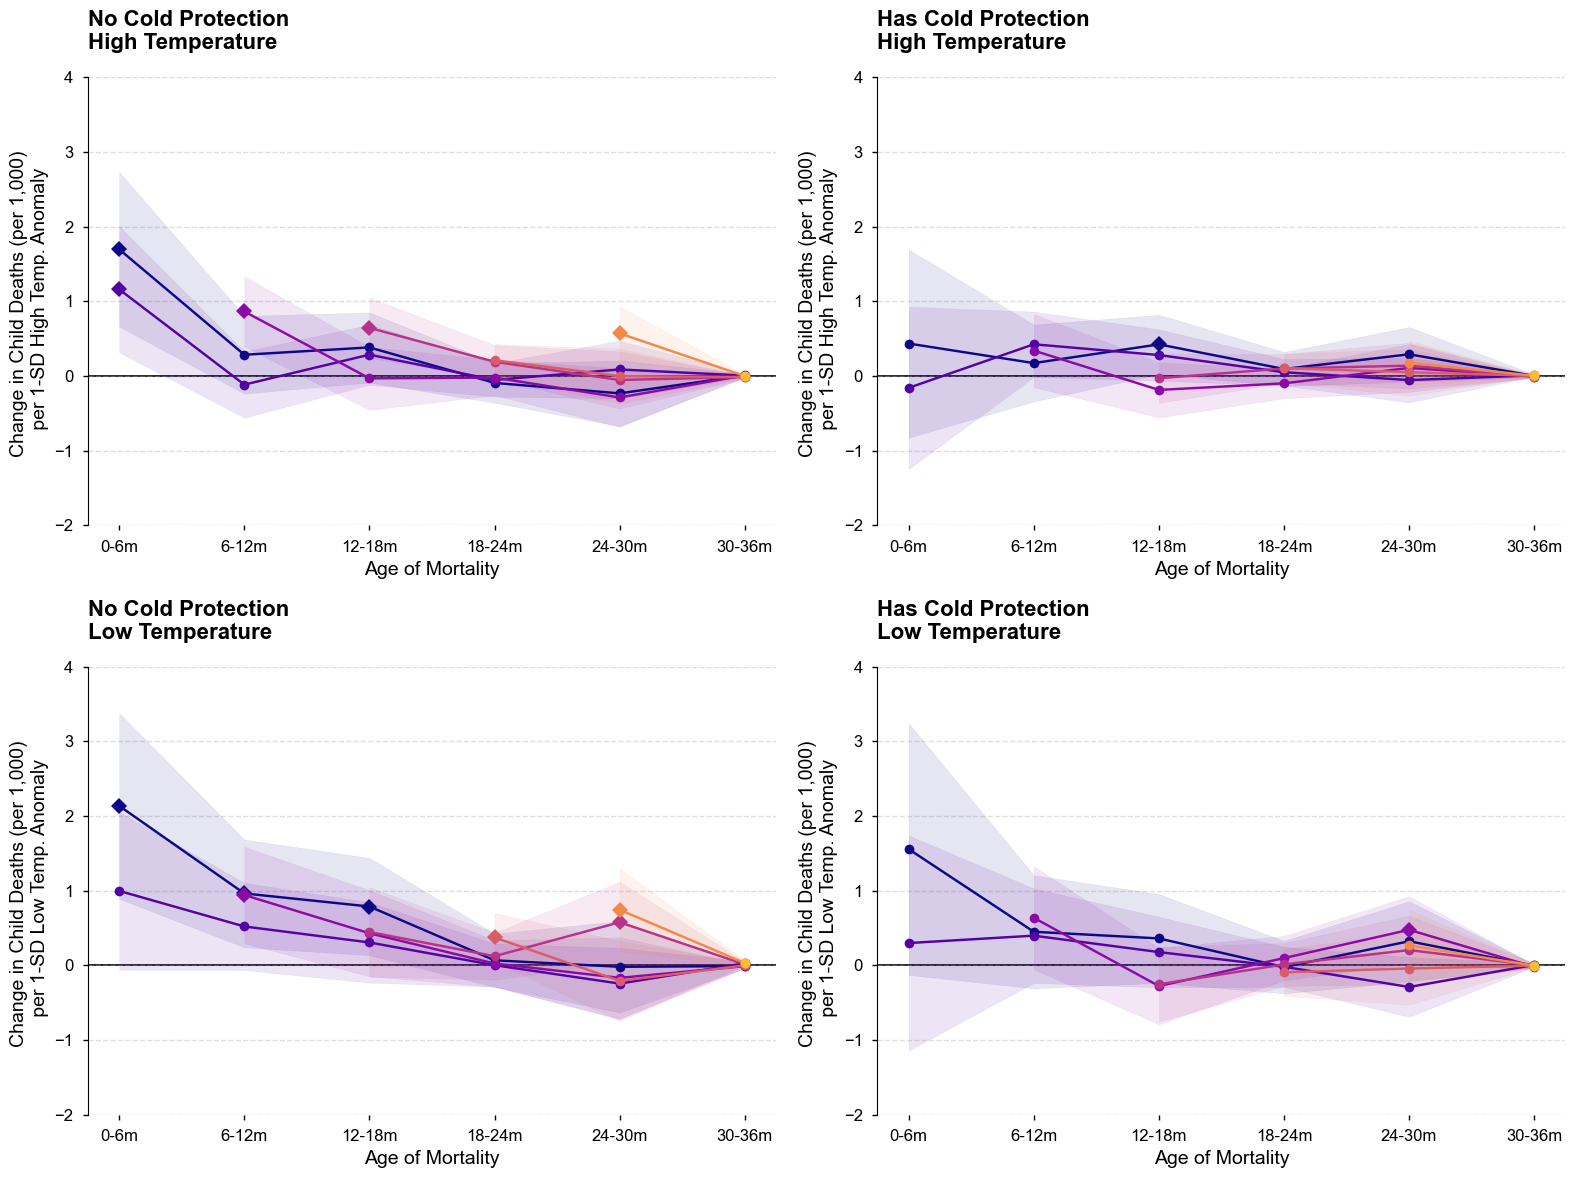

In [8]:
# Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 0.0 standard_fe standard_sym.txt 
# Outputs/heterogeneity/electricity/linear_dummies_true_spi1_b_avg_stdm_t semester - 1.0 standard_fe standard_sym.txt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\high_cold_protection\linear_dummies_true_spi1_b_avg_stdm_t semester - 0.0 standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='No Cold Protection\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='No Cold Protection\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][0],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\heterogeneity\high_cold_protection\linear_dummies_true_spi1_b_avg_stdm_t semester - 1.0 standard_fe standard_sym.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Has Cold Protection\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][1],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Has Cold Protection\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=False,
)


plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig High Cold Protection.png", dpi=450, bbox_inches="tight")

C:\Users\abbat\AppData\Local\Temp\ipykernel_28768\447573169.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map_name, num_lines+1)


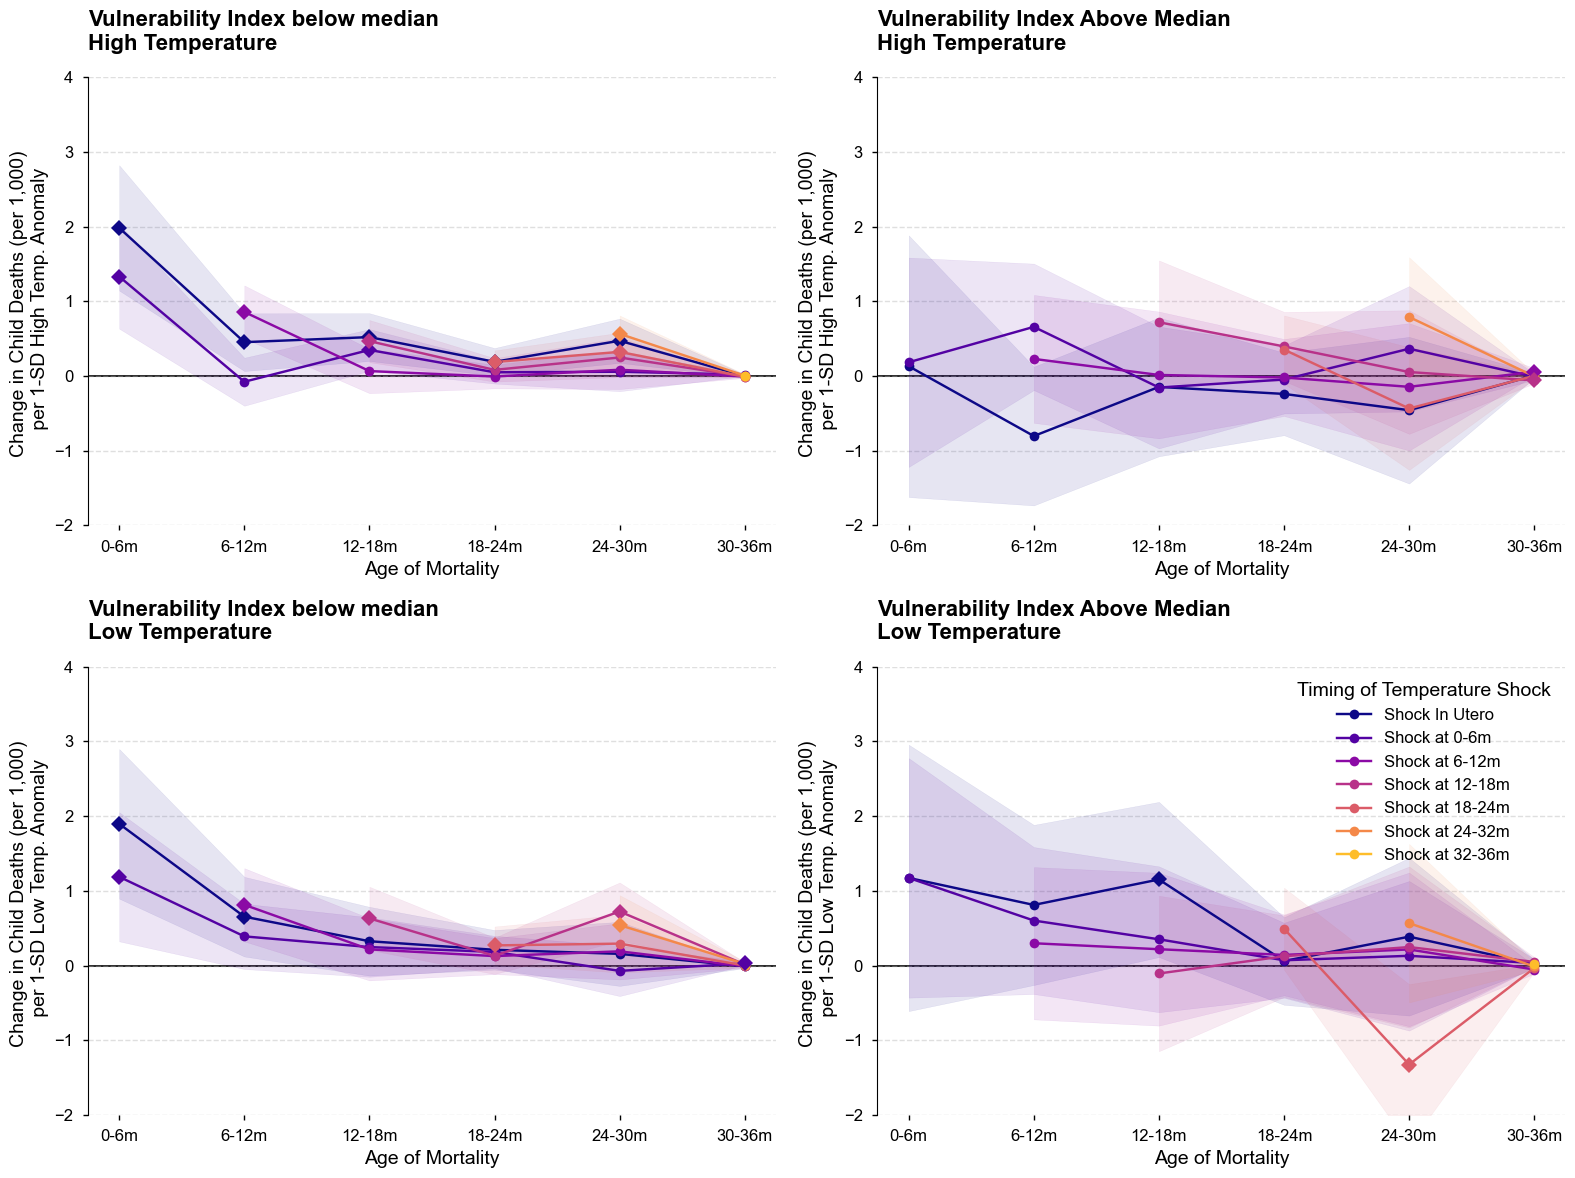

In [10]:
#### High vulnerability Index

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs/heterogeneity/high_vulnerability/linear_dummies_true_spi1_b_avg_stdm_t semester - 0 standard_fe standard_sym median.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Vulnerability Index below median\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][0],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Vulnerability Index below median\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][0],
    legend=False,
)


file_path = rf"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs/heterogeneity/high_vulnerability/linear_dummies_true_spi1_b_avg_stdm_t semester - 1 standard_fe standard_sym median.tex"
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)
outdata = outdata["temp"]["cell1"]
high_temp = {k : v for k,v in outdata.items() if "_pos_" in k}
low_temp  = negate_dict_values({k : v for k,v in outdata.items() if "_neg_" in k})

create_coefficient_plot(
    data=high_temp,
    title='Vulnerability Index Above Median\nHigh Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD High Temp. Anomaly',
    color_map_name='plasma',
    ax=axs[0][1],
    legend=False,
)

create_coefficient_plot(
    data=low_temp,
    title='Vulnerability Index Above Median\nLow Temperature',
    ylabel='Change in Child Deaths (per 1,000) \n per 1-SD Low Temp. Anomaly',
    color_map_name='plasma', # A contrasting, warm colormap
    ax=axs[1][1],
    legend=True,
)


plt.tight_layout()
plt.savefig(r"C:\Working Papers\Paper - Child Mortality and Climate Shocks\Outputs\Figures\spi1 stdm_t b_avg\Fig high_vulnerability.png", dpi=450, bbox_inches="tight")